# Kernel SVM and Regularization

In this short snippet we will see how regularization works and why it is **essential** when working with kernel SVM.

First, we create a *hardish* dataset (the `random_state=30` parameter ensures that the dataset generated is always the same.

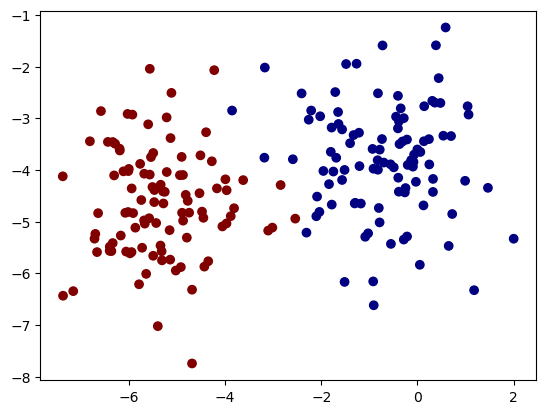

In [1]:
# Your code here.
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

(Xs, ys) = make_blobs(n_samples=200, n_features=2, centers=2, random_state=35)
plt.scatter(Xs[:,0], Xs[:,1], c=ys, cmap='jet')


This dataset isn't linearly separable. We will use an SVM with the Radial Basis Function (RBF) kernel. Recall that the RBF kernel corresponds to a feature map with **infinite** dimensions. The RBF kernel makes *any* dataset linearly separable, so we need to use the regularization hyperparameter $C$ to control the complexity of the resulting classifier.

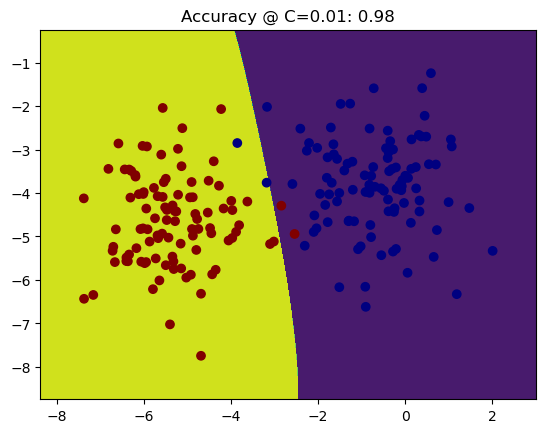

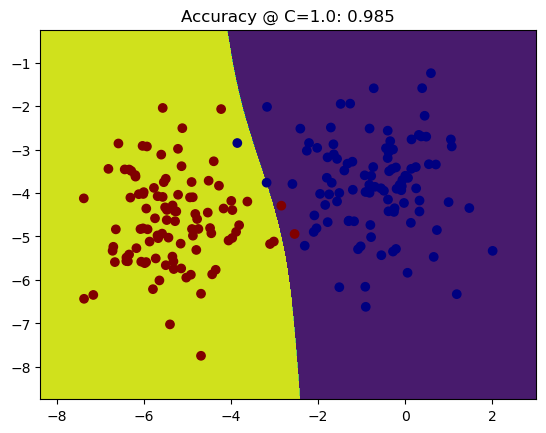

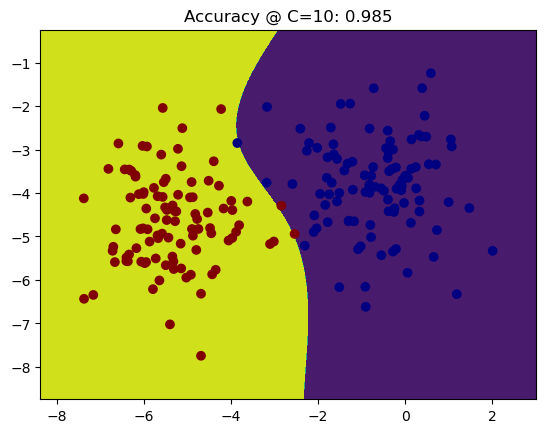

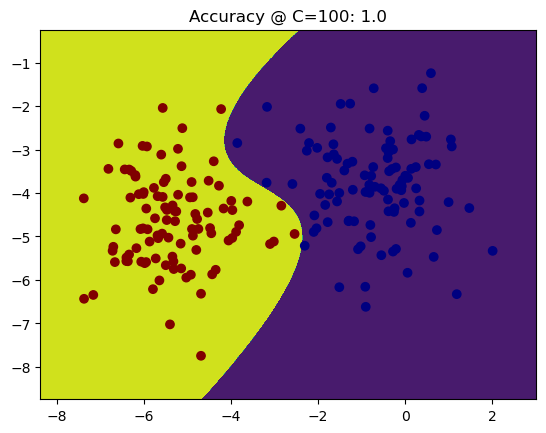

In [2]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

# Try a range of C values -- remember C is the weight on *errors*.
for C in [0.01, 1.0, 10, 100]:
    svc = SVC(C=C, kernel='rbf')
    svc.fit(Xs, ys)
    DecisionBoundaryDisplay.from_estimator(svc, Xs, grid_resolution=1000, response_method='predict')
    plt.scatter(Xs[:,0], Xs[:,1], c=ys, cmap='jet')
    plt.title((f'Accuracy @ C={C}: {accuracy_score(svc.predict(Xs), ys)}'))